In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
from scipy.integrate import solve_ivp

$$
\left\{ \begin{array}{l}
\ddot{x}=\phantom{g+} xf(x,y)\\
\ddot{y}= g+yf(x,y)\\
\end{array} \right.
,$$ gdzie
$ f(x,y) = \dfrac{-k}{m}\left(1-\dfrac{l}{\sqrt{x^2+y^2}}\right) $

In [193]:
k=100
l=0.5
m=1
g=-9.81

In [93]:
def f(x,y):
    return -k/m*(1-l/((x**2+y**2)**(1/2)))

In [94]:
def fun(t,u):
    x,y,dx,dy = u
    return dx, dy, x*f(x,y), g + y*f(x,y)

In [201]:
sol=solve_ivp(fun,(0,30),[1,0,0,0],t_eval=np.linspace(0,30,1000))

In [202]:
sol.y

array([[ 1.        ,  0.9776281 ,  0.91253511, ...,  0.09337778,
         0.127674  ,  0.17962324],
       [ 0.        , -0.00440805, -0.01743946, ...,  0.25045607,
         0.15040865,  0.06071797],
       [ 0.        , -1.47914204, -2.82628786, ...,  0.96488387,
         1.37262563,  2.1408886 ],
       [ 0.        , -0.29243069, -0.57258169, ..., -3.53515562,
        -3.1313215 , -2.89028415]])

In [97]:
x=sol.y[0]
y=-sol.y[1]

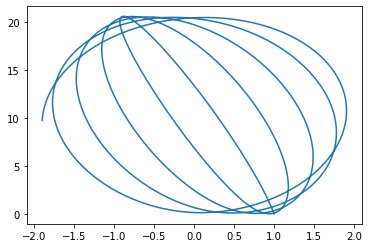

In [98]:
%matplotlib inline
plt.plot(x,y)

<IPython.core.display.Javascript object>


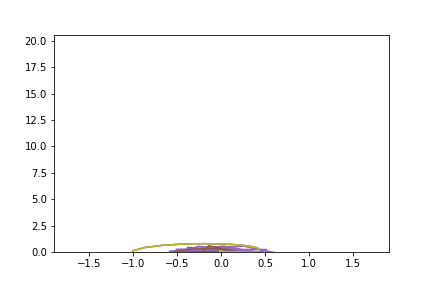

In [100]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
lim=max(abs(max(x)),abs(min(x)),abs(max(y)),abs(min(y)))
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))


def animate(i):
    line.set_data(x[:i],y[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x), interval=10,repeat=True)
plt.show()

$$
\left\{ \begin{array}{l}
\ddot{r}= g \cos\theta - \frac{k}{m}r+(l+r)\dot\theta\\
\ddot{\theta}(l+r) = -g\sin\theta + 2 \dot\theta\dot{r}
\end{array} \right.
$$

$$
\left\{ \begin{array}{l}
\ddot{r}= g \cos\theta - \frac{k}{m}r+(l+r)\dot\theta^2\\
\ddot{\theta}(l+r) = -g\sin\theta - 2 \dot\theta\dot{r}
\end{array} \right.
$$

In [161]:
def func(t,u):
    r,theta,dr,dtheta = u
    return dr, dtheta, g*np.cos(theta)-k/m*r+(l+r)*dtheta, (-g*np.sin(theta) + 2*dtheta*dr)/(l+r)

In [259]:
def func2(t,u):
    r,theta,dr,dtheta = u
    return dr, dtheta, g*np.cos(theta)-k/m*r+(l+r)*dtheta**2, (-g*np.sin(theta) - 2*dtheta*dr)/(l+r)

In [169]:
sol=solve_ivp(func,(0,30),[0,np.pi/3,0,0],t_eval=np.linspace(0,30,1000))

In [195]:
sol2=solve_ivp(func2,(0,30),[0,0,0,0],t_eval=np.linspace(0,30,1000))

In [174]:
x=(sol.y[0]+l)*np.cos(sol.y[1])
y=(sol.y[0]+l)*np.sin(sol.y[1])

In [196]:
x2=(sol2.y[0]+l)*np.sin(sol2.y[1])
y2=(sol2.y[0]+l)*np.cos(sol2.y[1])

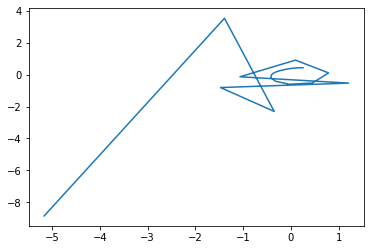

In [167]:
%matplotlib inline
plt.plot(x,y)

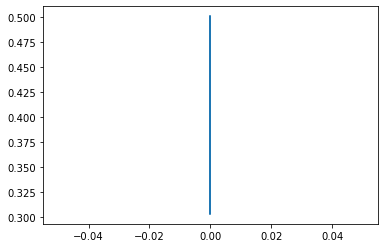

In [197]:
%matplotlib inline
plt.plot(x2,y2)

<IPython.core.display.Javascript object>


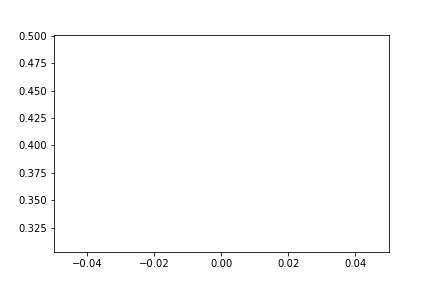

<ipython-input-198-0c5080445f8d>:6: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(min(x2),max(x2))


In [198]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x2),max(x2))
ax.set_ylim(min(y2),max(y2))


def animate(i):
    line.set_data(x2[:i],y2[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x2), interval=10,repeat=True)
plt.show()

In [322]:
k=10
l=0.5
m=1
g=-9.81

In [323]:
def func(t,u):
    r,theta,dr,dtheta = u
    return dr, dtheta, g*np.cos(theta)-k/m*r+(l+r)*dtheta**2, (-g*np.sin(theta) - 2*dtheta*dr)/(l+r)

In [331]:
sol=solve_ivp(func,(0,30),[l/2,np.pi/4,0,0])#,t_eval=np.linspace(0,30,100))

In [332]:
x=(sol.y[0]+l)*np.sin(sol.y[1])
y=(sol.y[0]+l)*np.cos(sol.y[1])

In [333]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))


def animate(i):
    line.set_data(x[:i],y[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x), interval=100,repeat=True)
plt.show()

<IPython.core.display.Javascript object>

In [278]:
x

array([ 1.26220648,  1.26220647,  1.26220556, ..., -0.58690355,
       -0.381629  , -0.33027786])

In [279]:
y

array([ 0.81045346,  0.81045345,  0.81045277, ..., -1.39478392,
       -0.83876657, -0.71098406])

In [280]:
len(x)

1141

In [284]:
max(x)

1.2622064772118446

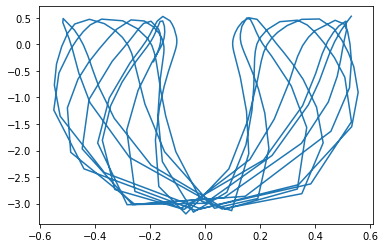

In [334]:
%matplotlib inline
plt.plot(x,y)